#Instructions
* **<font color="red">When you load this page, go to "Cell->Run All" to start the program running.  After that point, you should be able to use the sliders and buttons to manipulate the output.</font>**  
* If things go totally awry, you can go to "Kernel->Restart" and then "Cell->Run All".  A more drastic solution would be to close and reload the page, which will reset the code to its initial state.  
* If you're interested in programming, click the "Toggle raw code" button.  This will expose the underlying program, written in the Python3 programming language.  You can edit the code to your heart's content: just go to "Cell->Run All" after you modify things so the changes will be incorporated.  Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code


In [3]:
# -----------------------------------------------------------------------------------
# Javascript that gives us a cool hide-the-code button 

from IPython.display import HTML

HTML('''

<script>
    code_show=true; 
    
    function code_toggle() {
     if (code_show){
         $('div.input').hide();
     } else {
         $('div.input').show();
     }
     code_show = !code_show
    } 
    
    $( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle raw code">
</form>

''')

# ------------------------------------------------------------------------------------


 #Amino acid titration explorer

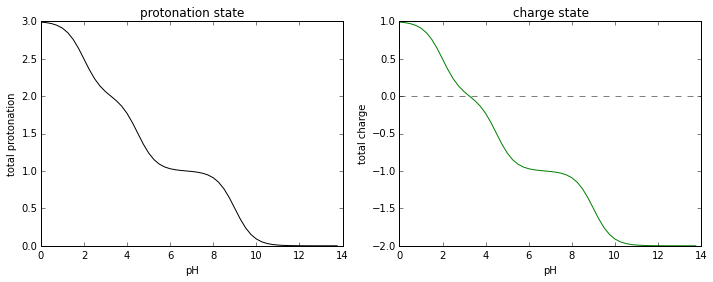

In [4]:


#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# libraries for making pretty sliders and interactive graphs
from IPython.html import widgets
from IPython.html.widgets import interactive
from IPython.display import display

def fractional_protonation(pKa,pH):
    """
    Calculate the protonation state of a titratable group versus pH given its pKa.  
    """
    
    theta_protonated = 1/(1 + 10**(pH-pKa))
    
    return theta_protonated
    

def fractional_charge(pKa,charge_when_protonated,pH):
    """
    Cacluate the fractional charge on a molecule given its pKa value, charge when ionized, and pH
    """
    
    theta_protonated = 1/(1 + 10**(pH-pKa))
    
    if charge_when_protonated == 0:
        theta_charge = -1*(1-theta_protonated)
    else:
        theta_charge = theta_protonated
        
    return theta_charge

def titrate_amino_acid(sidechain_pKa=4,charge_when_protonated=0,titratable_sidechain=True):
    """
    Calculate the total charge on a free amino acid as a function of pH.
    """
    
    
    # N- and C-terminal groups
    pKas = [9.0,2.0]
    charges = [1,0]
    
    # Are we adding a titratable sidec chain?
    if titratable_sidechain == True:
        pKas.append(sidechain_pKa)
        charges.append(charge_when_protonated)
    
    # Create a vector of pH values and a vector of zeros to hold total charge state vs. pH
    pH_list = np.arange(0,14,0.25)
    total_charge = np.zeros(len(pH_list))
    total_protonation = np.zeros(len(pH_list))
    
    # For every titratable group, calculate charge vs. pH and append to the total charge
    for i in range(len(pKas)):    
        total_charge = total_charge + fractional_charge(pKas[i],charges[i],pH_list)
        total_protonation = total_protonation + fractional_protonation(pKas[i],pH_list)
            
    fig, ax = plt.subplots(1,2)
    ax[0].plot(pH_list,total_protonation,color="black")
    ax[0].axhline(y=0,color="gray",linestyle="dashed")    
    ax[0].set_xlabel("pH")
    ax[0].set_ylabel("total protonation")
    ax[0].set_title("protonation state")
    
    ax[1].plot(pH_list,total_charge,color="green")
    ax[1].axhline(y=0,color="gray",linestyle="dashed")    
    ax[1].set_xlabel("pH")
    ax[1].set_ylabel("total charge")
    ax[1].set_title("charge state")
     
    
    fig.set_figwidth(10)
    fig.tight_layout()
    plt.show()
        
        
    
titratable_sc_widget = widgets.Checkbox(description="amino acid sidechain titrable?",value=True)
pKa_widget = widgets.FloatText(description="pKa of sidechain",value=4.5)
charge_widget = widgets.IntSlider(description="charge of protonated sidechain",min=0,max=1,step=1,value=0)

container = widgets.interactive(titrate_amino_acid,
                                titratable_sidechain=titratable_sc_widget,
                                sidechain_pKa=pKa_widget,
                                charge_when_protonated=charge_widget)

display(container)


#Appendix: the Henderson-Hasselbalch Equation and Fractional Charge


## Derive HH:
Start with the definition of an acid dissocation constant:

$$\frac{[H^{+}][A]}{[HA]}=K_{acid}$$

Rearrange and take the $-log_{10}$ of both sides:

$$[H^{+}]=\frac{K_{acid}[HA]}{[A]}$$

$$-log_{10}([H^{+}]) = -log_{10}\Big(\frac{K_{acid}[HA]}{[A]}\Big)$$

Apply the log rule that $log(XY) = log(X) + log(Y)$:

$$-log_{10}([H^{+}]) = -log_{10}(K_{acid}) -log_{10}\Big(\frac{[HA]}{[A]}\Big)$$

Recalling that $pX \equiv -log_{10}(X)$ we can write:

$$pH = pK_{a} - log_{10} \Big (\frac{[HA]}{[A]} \Big)$$

Then apply the log rule that $ -log(X) = log(1/X)$ to get:

$$pH = pK_{a} + log_{10} \Big (\frac{[A]}{[HA]} \Big)$$

This is the Henderson-Hasselbalch equation.  

## Derive fractional protonation

Now let's think about $\theta$, the fraction of some molecule $A$ that is protonated as a function of $pH$.  This is simply the concentration of protonated molecules ($[HA]$) over all possible molecules:

$$\theta \equiv \frac{[HA]}{[HA] + [A]}$$

We can rearrange Henderson-Hasselbalch to solve for $[A]$:

$$pH - pK_{a} = log_{10} \Big (\frac{[A]}{[HA]} \Big)$$

$$10^{(pH-pK_{a})} = \frac{[A]}{[HA]}$$

$$[HA] 10^{(pH-pK_{a})} = [A]$$

And then substitute into the equation for $\theta$:

$$\theta = \frac{[HA]}{[HA] + [HA] 10^{(pH-pK_{a})}}$$

$$\theta = \frac{1}{1 + 10^{(pH-pK_{a})}}$$

We now have an equation that relates the $pK_{a}$ and $pH$ to the saturation of a molecule.  

## Relate fractional protonation to fractional charge

To relate fractional protonation to the fractional charge, we need to know some chemistry. 
For example, a protonated carboxylic acid ($R-COOH$) is neutral, while a protonated amine ($NH^{+}_{4}$) is charged.  If you know the chemical structures of your amino acids, you should be able to reason about charge vs. pH given information about _protonation_ vs. pH.  The titration behaviors of the groups that titrate at reasonable pH values are shown below:

**Charge on protonated state = 0** 

Aspartic acid/glutamic acid/C-terminus ($pK_{a} \approx 2-4$): $R-COOH \rightleftharpoons \color{red}{R-COO^{-}} + \color{blue}{H^{+}}$

Tyrosine ($pK_{a} = 10.5 $): $R-OH \rightleftharpoons \color{red}{R-O^{-}} + \color{blue}{H^{+}}$

Cysteine ($pK_{a} = 8.4 $): $R-SH \rightleftharpoons \color{red}{R-S^{-}} + \color{blue}{H^{+}}$



**Charge on protonated state = 1**

Lysine/N-terminus ($pK_{a} \approx 10 $): $\color{blue}{R-NH^{+}_{3}} \rightleftharpoons R-NH_{2} + \color{blue}{H^{+}}$  

Histidine ($pK_{a} = 6.0 $): $\color{blue}{R-C_{3}H_{4}N_{2}^{+}} \rightleftharpoons R-C_{3}H_{3}N_{2} + \color{blue}{H^{+}}$

Arginine ($pK_{a} = 12.5 $): $\color{blue}{R-C_{1}H_{5}N_{3}^{+}} \rightleftharpoons R-C_{1}H_{4}N_{3} + \color{blue}{H^{+}}$
    